In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install igraph

In [3]:
from igraph import *

In [38]:
target = 'IssueCommentEvent'
path = '/content/drive/My Drive/social_computing/data/'+ target + '.txt'

In [39]:
f = open(path, encoding = "utf-8")
file_data = f.readlines()
print(len(file_data))

138808


In [40]:
node_ids = []
for x in range(len(file_data)//2-1):
  pair = file_data[x*2+1].strip('\n').split(' ')[1:]
  l = len(pair)
  for i in range(l-1):
    node_ids.append(int(pair[i]))
node_ids = list(set(node_ids))

In [41]:
node_ids.sort()
print(node_ids[:100])

[27, 28, 68, 130, 144, 363, 426, 507, 912, 966, 1032, 1252, 1462, 1734, 1904, 2019, 2376, 2548, 2727, 2747, 3045, 3282, 3287, 3314, 3542, 4016, 4048, 4828, 5266, 5497, 5625, 5954, 6040, 6094, 6133, 6738, 7050, 7497, 7661, 8393, 8514, 8970, 9302, 9525, 9664, 9823, 9980, 10664, 10865, 10910, 11137, 11493, 11572, 11573, 11598, 12494, 13677, 13992, 14507, 14603, 15257, 15293, 15422, 15435, 16267, 16309, 16667, 17409, 17504, 18027, 18294, 18639, 19355, 19438, 20669, 20693, 20724, 20954, 21653, 21829, 21950, 22361, 22601, 22826, 23393, 23513, 23647, 23715, 23892, 23916, 23931, 24954, 25348, 26288, 26554, 27039, 27372, 27412, 28039, 28438]


In [42]:
# one to one map
id_map1 = dict()
id_map2 = dict()
for i in range(len(node_ids)):
  id_map1[str(i)] = node_ids[i]
  id_map2[str(node_ids[i])] = i

In [43]:
# If we simply feed all pairs rudely into grah, there will be too many nodes which can cause session crash
# we decide to create a dictionary to store ids of nodes having at least one edge, and we redifine these nodes' ids
temp = 0
node_pairs = []
for x in range(len(file_data)//2-1):
  pair = file_data[x*2+1].strip('\n').split(' ')[1:]
  if temp%50000==0:
    node_pairs = list(set(node_pairs))
    print(temp)
  temp = temp + 1
  l = len(pair)
  for i in range(l-1):
    for j in range(i+1, l-1):
      first, second = pair[i], pair[j]
      node_pairs.append((id_map2[first],id_map2[second]))

0
50000


In [44]:
node_pairs = list(set(node_pairs))

In [45]:
print(f"# node pairs:{len(node_pairs)}")
print(f"# node ids:{len(node_ids)}")

# node pairs:746445
# node ids:75728


In [46]:
g = Graph(node_pairs)

In [47]:
Degree = g.degree()

In [48]:
for i in range(10):
  index = Degree.index(max(Degree))
  print(id_map1[str(index)], '|','|',Degree[index])
  Degree[index] = 0

321278 | | 2306
27193779 | | 1808
206084 | | 1738
7691631 | | 1698
3228505 | | 1551
10270250 | | 1390
11061773 | | 1317
1420493 | | 1255
24560307 | | 1139
9384267 | | 1108


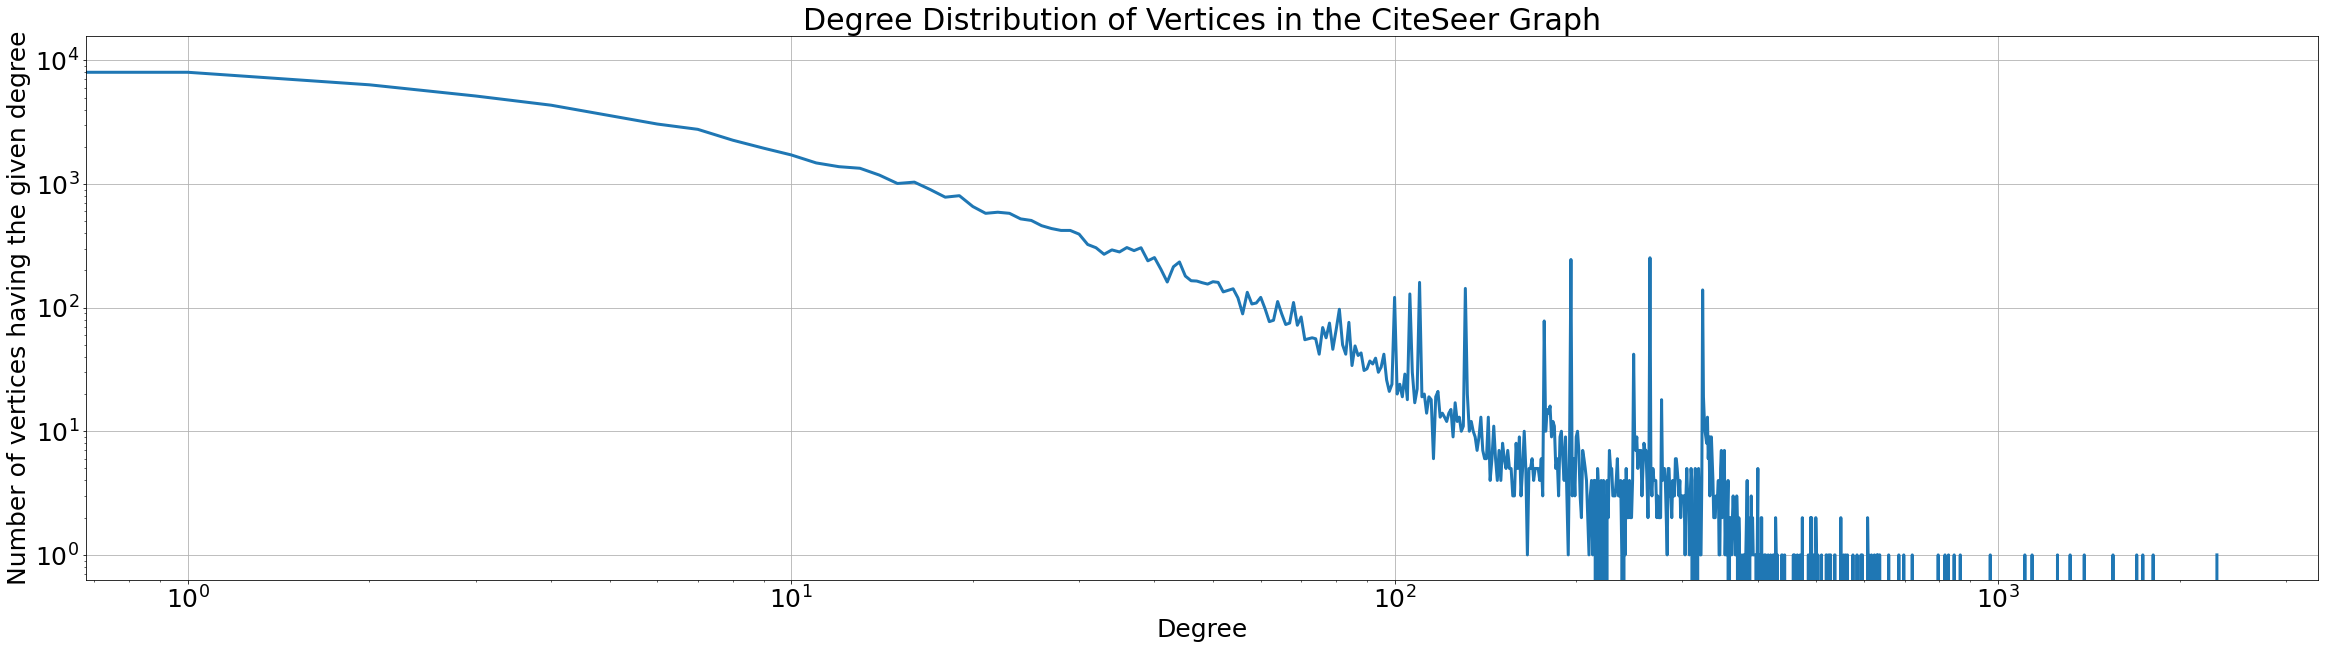

<Figure size 432x288 with 0 Axes>

In [49]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 25})
degrees = g.degree()
x = [x for x in range(max(degrees)+1)]
degree_counts = [0 for x in range(max(degrees)+1)]

for i in degrees:
    degree_counts[i] += 1


plt.figure(figsize=(40,10))
plt.loglog(x, degree_counts, linewidth=3.0)
plt.ylabel('Number of vertices having the given degree')
plt.xlabel('Degree')
plt.title('Degree Distribution of Vertices in the CiteSeer Graph')

plt.grid(True)

plt.show()
plt.draw()

In [50]:
rank = g.pagerank(directed=False)

In [51]:
for i in range(10):
  index = rank.index(max(rank))
  print(id_map1[str(index)],'|','|', rank[index]*10000)
  rank[index] = 0

321278 | | 12.836063163558814
206084 | | 12.182129136487386
7691631 | | 11.334998174029815
3228505 | | 9.581670921929092
27193779 | | 9.34194119126938
1420493 | | 8.09320255471226
10270250 | | 7.689296222718188
11061773 | | 6.591542444737357
19872456 | | 6.071249344805698
9384267 | | 5.9682403291913655


In [52]:
degrees = g.degree()
rank = g.pagerank(directed=False)
final_de = []
final_ra = []
for i in range(10000):
  index = (rank.index(max(rank)))
  final_ra.append(id_map1[str(index)])
  rank[index] = 0
  index = (degrees.index(max(degrees)))
  final_de.append(id_map1[str(index)])
  degrees[index] = 0


In [53]:
import numpy as np
np.save(target+'_degree.npy', final_de)
np.save(target+'_rank.npy', final_ra)